# Exercise 1: Creating Networks from Data

In [1]:
# Load relevant libraries
# Extensive documentation for iGraph here: http://igraph.org/r/doc/
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




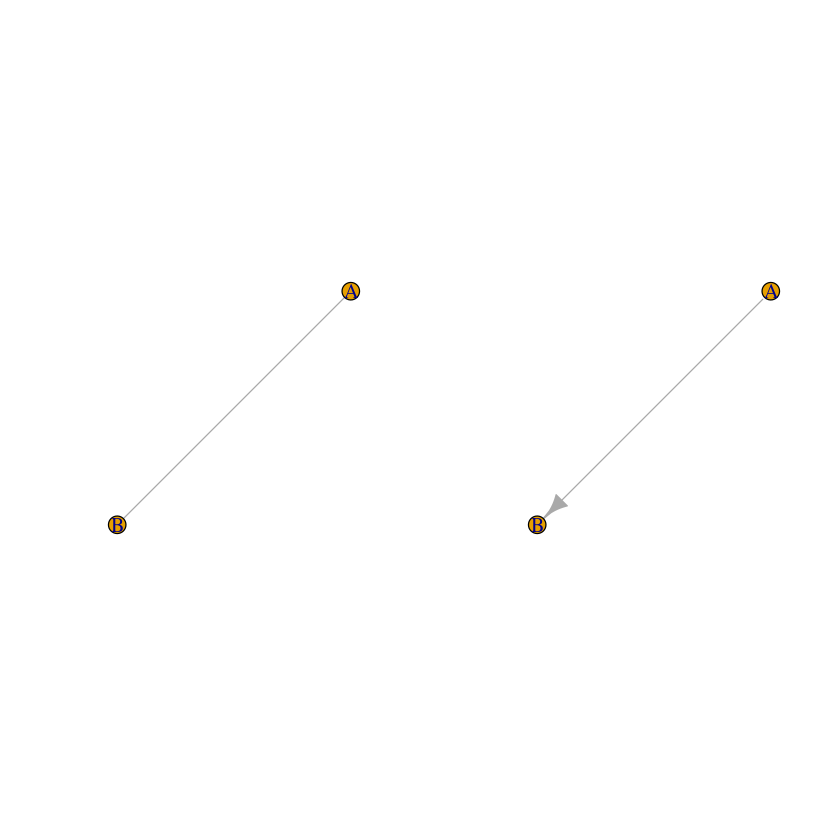

In [2]:
# Build a network using basic formulas:
graph.onelinkUnD <- graph.formula(A-B)
graph.onelinkD <- graph.formula(A-+B) 
# With this function the (+) sign signifies the "arrowhead".

# This gives us a two node network with one edge. 
par(mfrow=c(1,2)) # This is a plotting command that says to plot in a
                  # 1 row, 2 column grid so we can view plots side by side
plot.igraph(graph.onelinkUnD)
plot.igraph(graph.onelinkD)

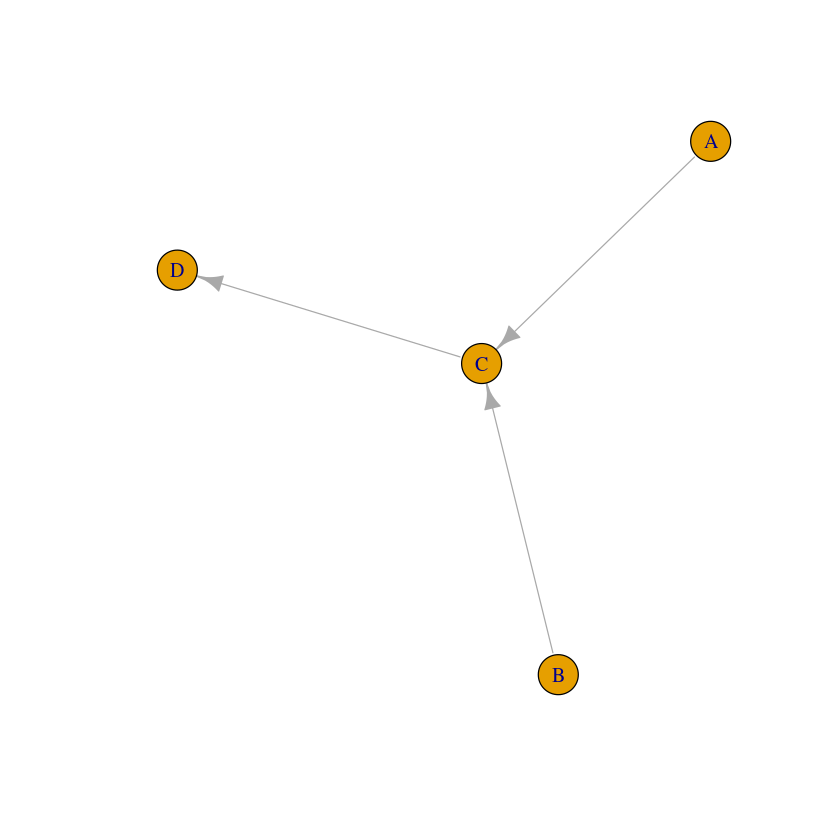

In [3]:
# Using graph.formula() you have to write out all edges explicitly
graph.fournode<-graph.formula(A-+C,B-+C,C-+D)
plot.igraph(graph.fournode)

# Can you plot the 6 node network from the lecture?

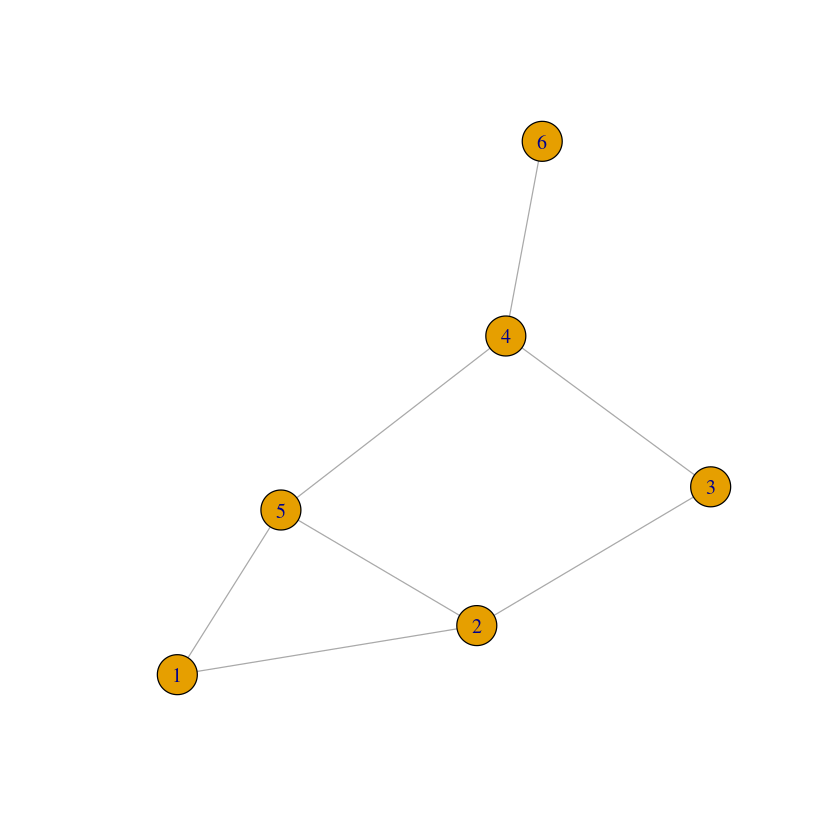

In [4]:
graph.sixnode<-graph.formula(1-1,1-2,1-5,2-5,2-3,3-4,5-4,4-6)
plot.igraph(graph.sixnode) # No self loop?

In [5]:
# Check the adjacency matrix
gsixadj<-get.adjacency(graph.sixnode)
gsixadj

6 x 6 sparse Matrix of class "dgCMatrix"
  1 2 5 3 4 6
1 . 1 1 . . .
2 1 . 1 1 . .
5 1 1 . . 1 .
3 . 1 . . 1 .
4 . . 1 1 . 1
6 . . . . 1 .

6 x 6 sparse Matrix of class "dgCMatrix"
  1 2 5 3 4 6
1 1 1 1 . . .
2 1 . 1 1 . .
5 1 1 . . 1 .
3 . 1 . . 1 .
4 . . 1 1 . 1
6 . . . . 1 .

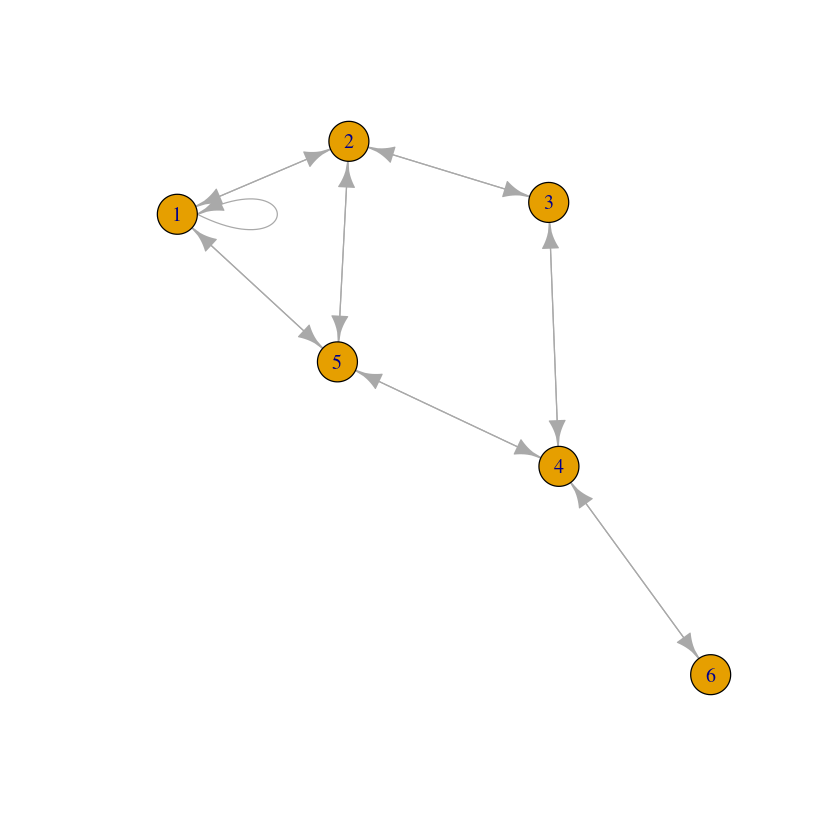

In [6]:
gsixadj[1,1] <- 1
gsixadj
plot.igraph(graph.adjacency(gsixadj))

In [7]:
?graph.adjacency

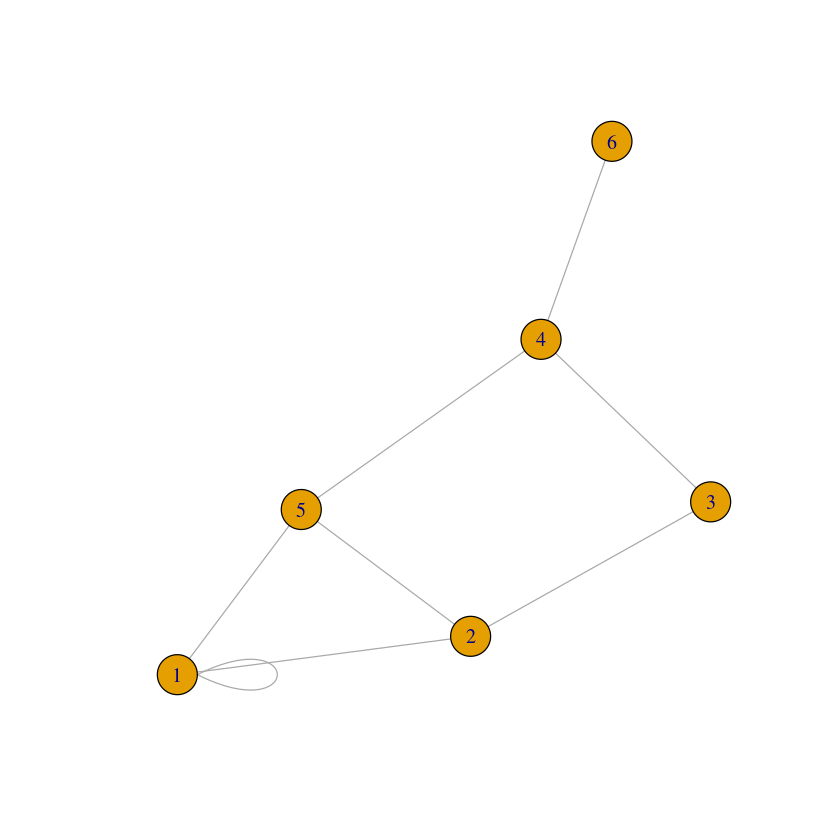

In [8]:
# Wait! Now its directed? Check the documentation to see defaults
plot.igraph(graph.adjacency(gsixadj,mode=c("undirected")))

In [9]:
# How about the bipartite network? 
# First we need to create the corresponding incidence matrix
m <- rbind(c(1,0,1),c(1,1,0),c(0,0,1))
m <- as.matrix(m)
rownames(m) <- c("1","2","3")
colnames(m) <- c("A","B","C")
m

A,B,C
1,0,1
1,1,0
0,0,1


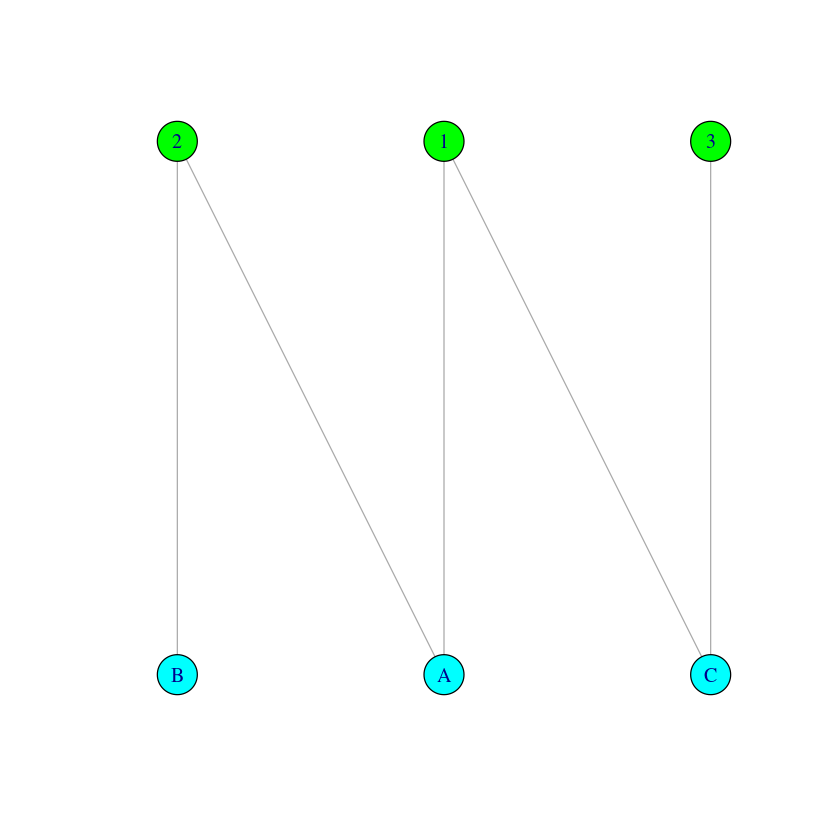

In [10]:
# Now create a graph from the incidence matrix
# and plot the graph using "layout=layout_as_bipartite"
g <- graph_from_incidence_matrix(m)
plot(g, layout = layout_as_bipartite,
     vertex.color=c("green","cyan")[V(g)$type+1])

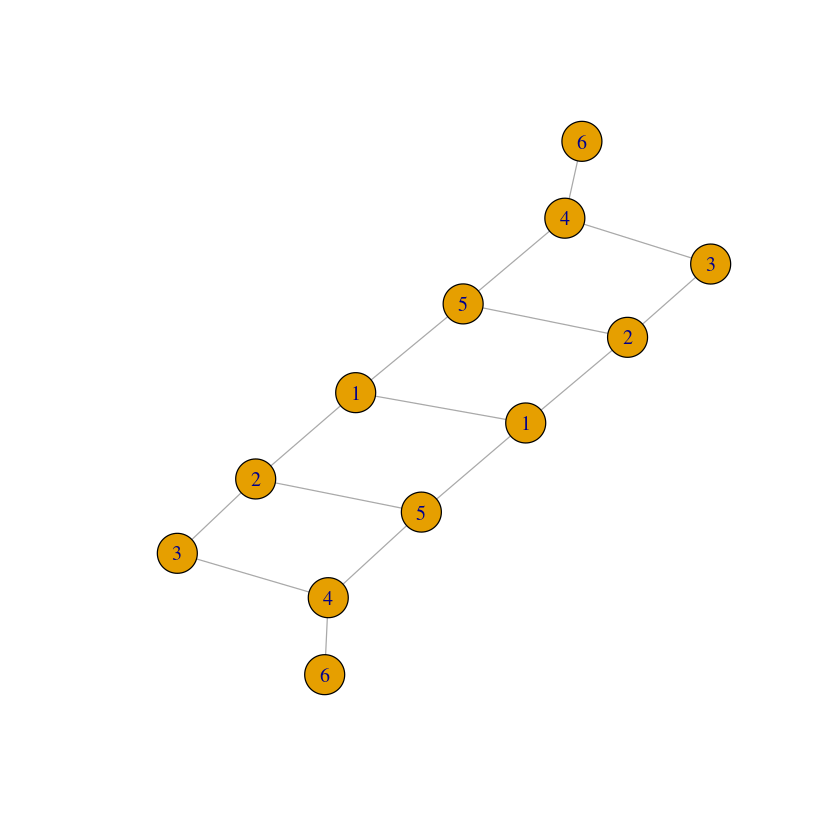

In [11]:
# What happens if we use our adjacency matrix from the first graph as 
# an incidence matrix for an undirected graph?
bipartite <- graph_from_incidence_matrix(gsixadj)
plot.igraph(bipartite)

In [12]:
# Creating networks manually is not practical
# Better to load them from a file
sdata <- read.table(file="../Data/SimpleNet.tsv",h=T)
head(sdata)

NodeA,NodeB
1,1
1,2
1,5
2,5
2,3
3,4


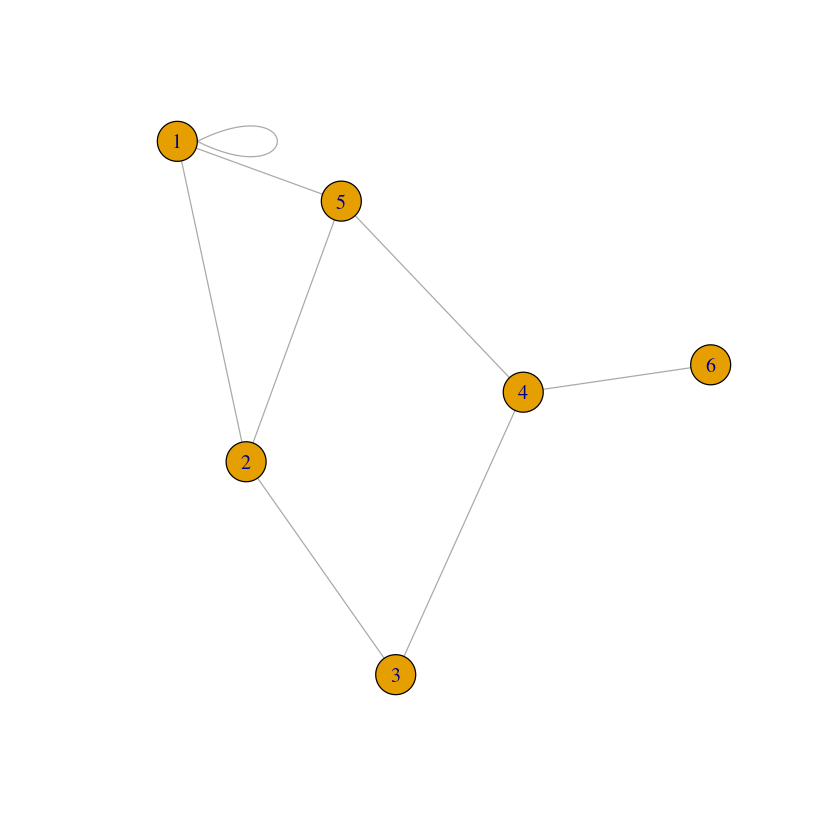

In [13]:
g <- graph.data.frame(sdata, directed=F)
plot.igraph(g)

In [14]:
sbdata <- read.table(file="../Data/SimpleBipartite.tsv",h=T)
head(sbdata)

NodeA,NodeB
1,A
1,C
2,A
2,B
3,C


In [15]:
# Create a bipartite graph from an edge list instead of an incidence matrix
g <- graph.data.frame(sbdata, directed = F)
V(g)$type <- V(g)$name %in% sbdata[,2]
g

IGRAPH 2921bdc UN-B 6 5 -- 
+ attr: name (v/c), type (v/l)
+ edges from 2921bdc (vertex names):
[1] 1--A 1--C 2--A 2--B 3--C

In [16]:
V(g)$type+1

[1] 1 1 1 2 2 2

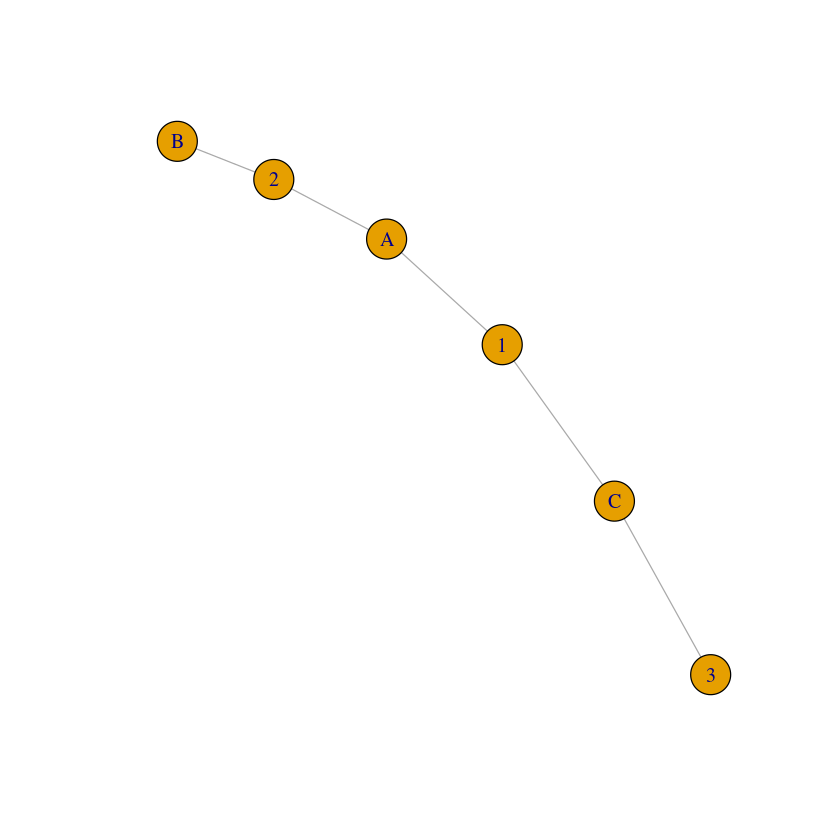

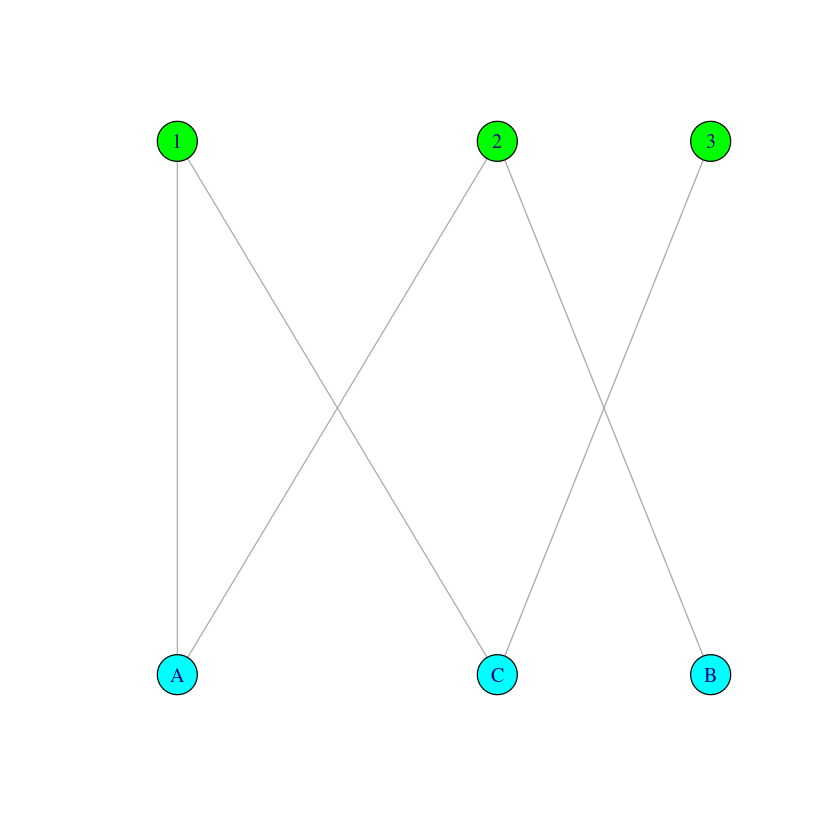

In [17]:
# Plotting bipartite graphs
plot.igraph(g)
plot.igraph(g, layout = layout_as_bipartite,
     vertex.color=c("green","cyan")[V(g)$type+1])

In [18]:
 V(g)$type

[1] FALSE FALSE FALSE  TRUE  TRUE  TRUE

In [19]:
V(g)$type+1

[1] 1 1 1 2 2 2